In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi


In [3]:
INPUT_PATH = 'Data/Results/spotify_clustered.csv'
df = pd.read_csv(INPUT_PATH)
df


,title,artist,top_genre,year,bpm,nrgy,dnce,db,live,val,dur,acous,spch,pop,duration_min,pca_1,pca_2,cluster
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,3.616667,1.367638,1.366887,0
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,4.383333,1.196675,-1.000118,3
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,3.333333,2.106088,0.195031,0
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,4.916667,1.304796,-0.025456,0
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,3.683333,0.512419,0.495678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75,2.933333,-0.823983,0.600321,2
582,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75,3.433333,0.411229,1.386095,0
583,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70,4.333333,0.406386,-1.655790,3
584,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69,3.616667,-0.035846,-1.188146,2


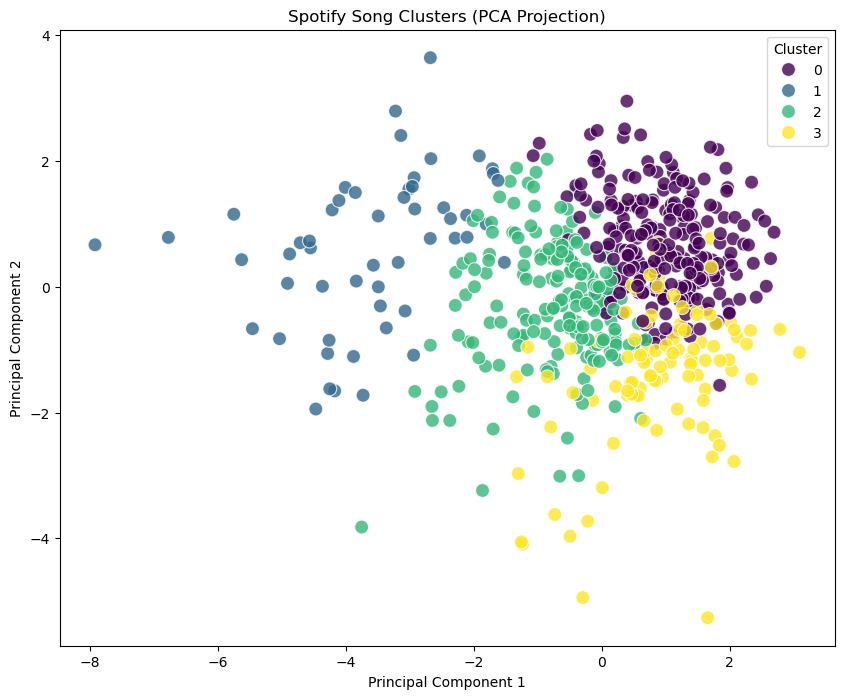

In [4]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('Spotify Song Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

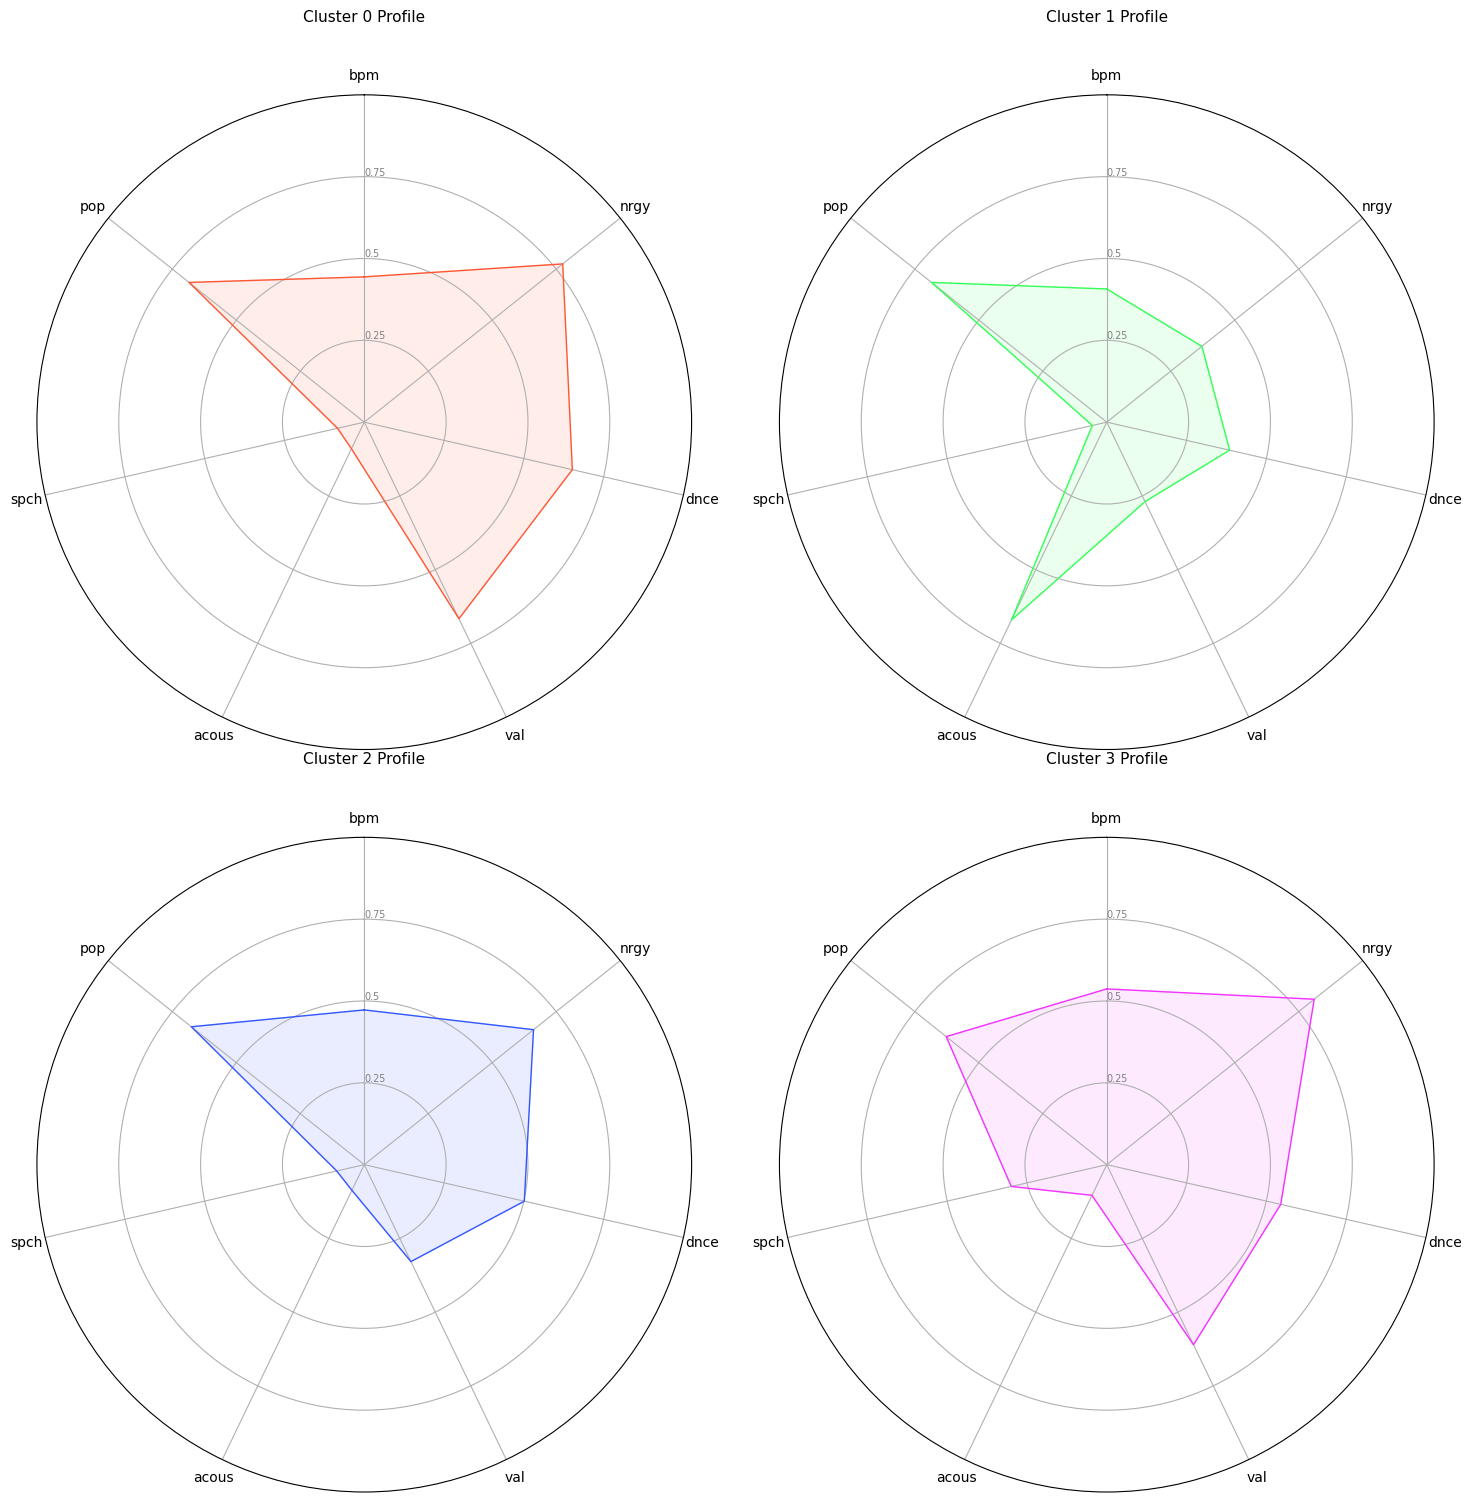

In [9]:
# 3. Cluster Profiling (Radar Charts)
# We need to normalize features to 0-1 range just for this visualization 
# so they fit on the radar chart nicely.
from sklearn.preprocessing import MinMaxScaler

features_to_plot = ['bpm', 'nrgy', 'dnce', 'val', 'acous', 'spch', 'pop']
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features_to_plot] = scaler.fit_transform(df[features_to_plot])

cluster_means = df_normalized.groupby('cluster')[features_to_plot].mean()

def create_radar_chart(means_df, cluster_id, color):

    categories = list(means_df.columns)
    N = len(categories)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(2, 2, cluster_id + 1, polar=True)
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], categories)
    

    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25","0.5","0.75"], color="grey", size=7)
    plt.ylim(0, 1)
    
    values = means_df.loc[cluster_id].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Cluster {cluster_id}", color=color)
    ax.fill(angles, values, color=color, alpha=0.1)
    
    plt.title(f"Cluster {cluster_id} Profile", size=11, y=1.1)

# Plot Radar Charts for all clusters
plt.figure(figsize=(15, 15))
colors = ['#FF5733', '#33FF57', '#3357FF', '#F333FF', '#FFFF33'] # Add more if K > 5

for i in range(len(cluster_means)):
    create_radar_chart(cluster_means, i, colors[i % len(colors)])

plt.tight_layout()
plt.show()

In [8]:
print("--- Cluster Insights ---")
for cluster_id in sorted(df['cluster'].unique()):
    print(f"\nCluster {cluster_id} Summary:")
    
    n_songs = len(df[df['cluster'] == cluster_id])
    avg_bpm = df[df['cluster'] == cluster_id]['bpm'].mean()
    avg_energy = df[df['cluster'] == cluster_id]['nrgy'].mean()
    
    print(f"  - Number of Songs: {n_songs}")
    print(f"  - Avg BPM: {avg_bpm:.1f}")
    print(f"  - Avg Energy: {avg_energy:.1f}")
    
    top_artists = df[df['cluster'] == cluster_id]['artist'].value_counts().head(3).index.tolist()
    print(f"  - Top Artists: {', '.join(top_artists)}")
    
    sample_songs = df[df['cluster'] == cluster_id]['title'].head(3).tolist()
    print(f"  - Sample Songs: {sample_songs}")

--- Cluster Insights ---

Cluster 0 Summary:
  - Number of Songs: 248
  - Avg BPM: 115.3
  - Avg Energy: 76.9
  - Top Artists: Katy Perry, Maroon 5, Calvin Harris
  - Sample Songs: ['Hey, Soul Sister', 'TiK ToK', 'Bad Romance']

Cluster 1 Summary:
  - Number of Songs: 53
  - Avg BPM: 109.3
  - Avg Energy: 38.9
  - Top Artists: Christina Aguilera, Justin Bieber, Birdy
  - Sample Songs: ['Empire State of Mind (Part II) Broken Down', 'Bound To You - Burlesque Original Motion Picture Soundtrack', 'You Lost Me']

Cluster 2 Summary:
  - Number of Songs: 186
  - Avg BPM: 120.1
  - Avg Energy: 66.2
  - Top Artists: The Chainsmokers, Rihanna, P!nk
  - Sample Songs: ['Secrets', 'OMG (feat. will.i.am)', 'Alejandro']

Cluster 3 Summary:
  - Number of Songs: 99
  - Avg BPM: 130.5
  - Avg Energy: 80.2
  - Top Artists: Nicki Minaj, Katy Perry, Pitbull
  - Sample Songs: ['Love The Way You Lie', 'Cooler Than Me - Single Mix', 'Like A G6']
